# Human - Horse classification with TensorFlow
> **Work done by**: Nwachukwu Anthony  
> **Email**: nwachukwuanthony2015@gmail.com

## Download Data

In [10]:
import os
import requests
import urllib.request
import zipfile

In [8]:
dirName = 'data'
 
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  data  Created 


In [9]:
train_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip'
validation_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip'
urllib.request.urlretrieve(train_url, 'data/train_horse-or-human.zip')
urllib.request.urlretrieve(validation_url, 'data/validation_horse-or-human.zip')

('data/validation_horse-or-human.zip',
 <http.client.HTTPMessage at 0x199e6fd3668>)

In [12]:
local_zip = 'data/train_horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/train-horse-or-human')
local_zip = 'data/validation_horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [21]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/data/train-horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/data/train-horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/data/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/data/validation-horse-or-human/humans')

## Building a Small Model from Scratch

### import tensorflow.

In [16]:
import tensorflow as tf

### add the densely connected layers.

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### compile

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

### create a function to preprocess the image dataset

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

### apply the preprocessing to the image datasets

In [23]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'data/train-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'data/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### train the model

In [30]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=1,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
1/1 [==============================] - 96s 96s/step - loss: 0.6252 - acc: 0.6797 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 2/10
1/1 [==============================] - 61s 61s/step - loss: 0.6221 - acc: 0.6484 - val_loss: 0.6581 - val_acc: 0.5000
Epoch 3/10
1/1 [==============================] - 63s 63s/step - loss: 0.6345 - acc: 0.7109 - val_loss: 0.6843 - val_acc: 0.5000
Epoch 4/10
1/1 [==============================] - 26s 26s/step - loss: 0.5851 - acc: 0.6667 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 5/10
1/1 [==============================] - 60s 60s/step - loss: 0.5780 - acc: 0.6797 - val_loss: 0.6379 - val_acc: 0.8359
Epoch 6/10
1/1 [==============================] - 67s 67s/step - loss: 0.5854 - acc: 0.7422 - val_loss: 0.6641 - val_acc: 0.5078
Epoch 7/10
1/1 [==============================] - 69s 69s/step - loss: 0.5712 - acc: 0.7266 - val_loss: 0.6382 - val_acc: 0.6211
Epoch 8/10
1/1 [==============================] - 71s 71s/step - loss: 0.6114 - acc: 0.6953 - val

### plot the accuracies

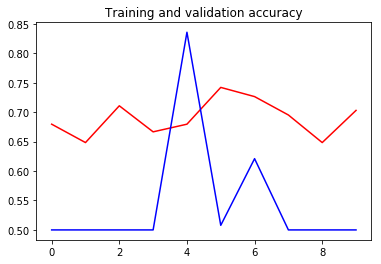

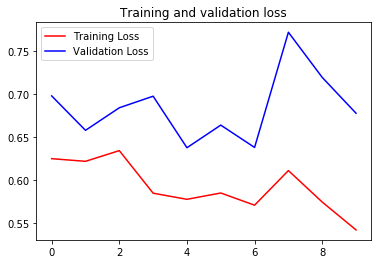

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()